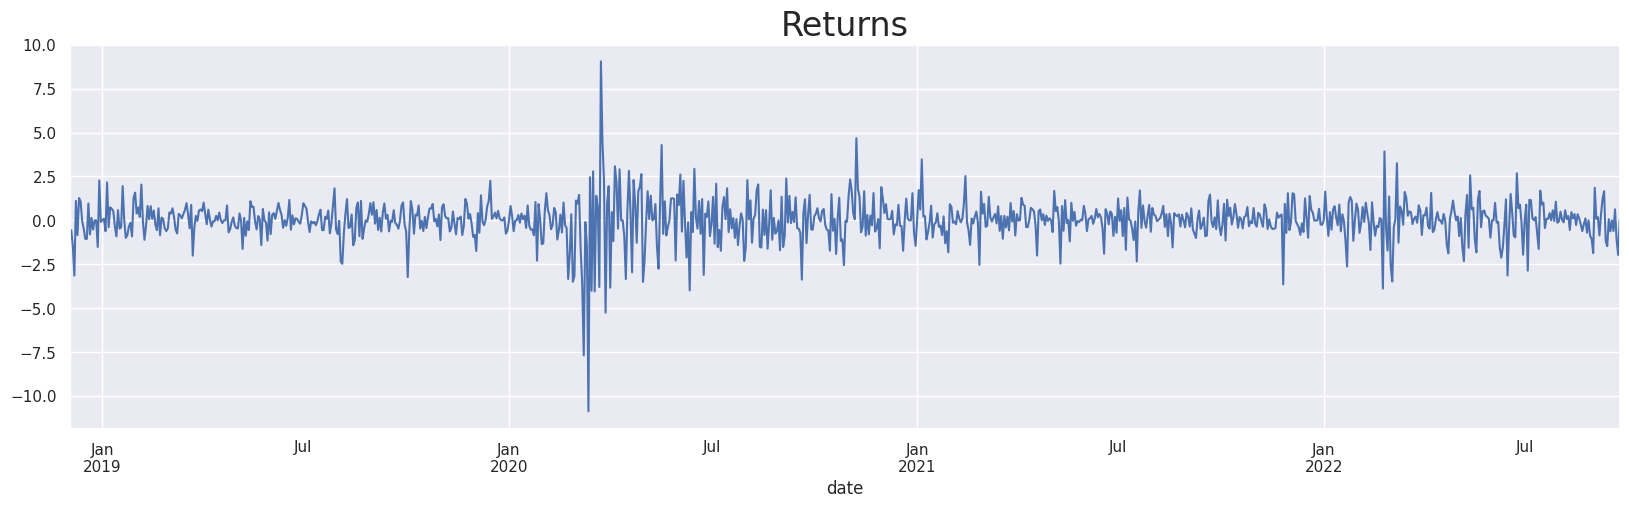

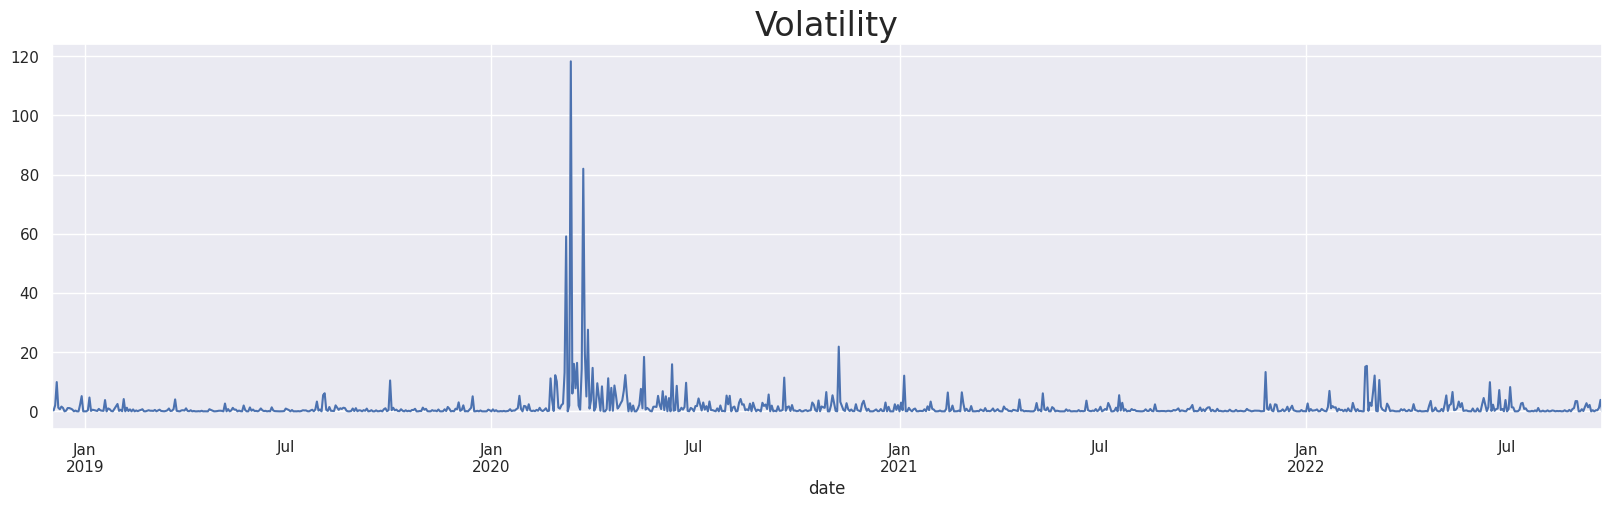

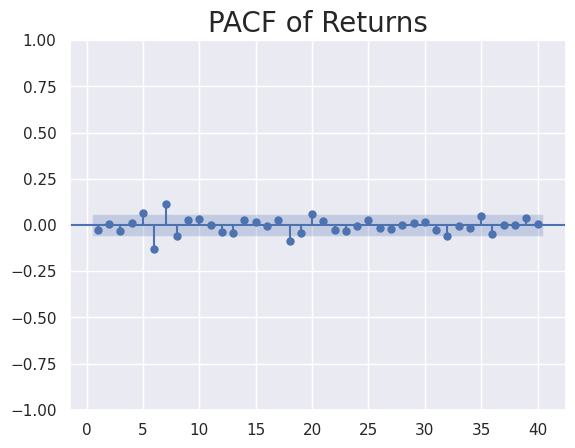

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1409.5869366024106
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1401.7748877256067
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1401.7748844130797
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1401.77
Distribution:                  Normal   AIC:                           2811.55
Method:            Maximum Likelihood   BIC:                           2831.16
                                        No. Observations:                  995
Date:                Sat, Oct 14 2023   Df Residuals:                      994
Time:       

In [2]:
#Importando los paquetes relevantes
#import pandas as pd: Importa la biblioteca pandas y la renombra como 'pd', utilizada para manipular y analizar datos tabulares.
#import numpy as np: Importa la biblioteca numpy y la renombra como 'np', utilizada para operaciones numéricas eficientes en Python.
#import matplotlib.pyplot as plt: Importa el módulo de trazado de la biblioteca Matplotlib para crear gráficos y lo renombra como 'plt'.
#import statsmodels.graphics.tsaplots as sgt: Importa el módulo 'tsaplots' de la biblioteca statsmodels para realizar análisis de series temporales y lo renombra como 'sgt'.
#import statsmodels.tsa.stattools as sts: Importa el módulo 'stattools' de la biblioteca statsmodels, utilizado para herramientas estadísticas en el análisis de series temporales, y lo renombra como 'sts'.
#from statsmodels.tsa.arima_model import ARIMA: Importa la clase ARIMA del módulo 'arima_model' de statsmodels, que se utiliza para modelar series temporales.
#from scipy.stats.distributions import chi2: Importa la distribución chi-cuadrado de la biblioteca SciPy, que se utiliza para realizar pruebas de hipótesis.
#from math import sqrt: Importa la función 'sqrt' (raíz cuadrada) del módulo 'math' de Python.
#import seaborn as sns: Importa la biblioteca Seaborn, que se utiliza para mejorar la estética de los gráficos y visualización de datos.
!pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

#Importando de datos y preprocesamiento
#raw_csv_data = pd.read_csv("df_comp.csv"): Lee un archivo CSV llamado "df_comp.csv" y lo almacena en un DataFrame llamado 'raw_csv_data'.
#df_comp=raw_csv_data.copy(): Crea una copia del DataFrame 'raw_csv_data' y la almacena en 'df_comp'.
#df_comp.date = pd.to_datetime(df_comp.date, format='%Y-%m-%d', dayfirst=True): Convierte la columna 'date' en formato de fecha con el formato especificado.
#df_comp.set_index("date", inplace=True): Establece la columna 'date' como el índice del DataFrame 'df_comp'.
#df_comp=df_comp.asfreq('b'): Establece la frecuencia de los datos en el DataFrame como días laborables ('b').
#df_comp = df_comp.ffill(): Rellena los valores faltantes en el DataFrame utilizando el método 'forward fill' (rellenar hacia adelante).
#df_comp['market_value']=df_comp.ftse: Crea una nueva columna llamada 'market_value' en el DataFrame y la iguala a la columna 'ftse'.
#del df_comp['spx '], del df_comp[' dax '], del df_comp['ftse'], del df_comp['nikkei']: Elimina las columnas 'spx', 'dax', 'ftse' y 'nikkei' del DataFrame 'df_comp'.
#size = int(len(df_comp)*0.8): Calcula el tamaño deseado para la división de datos basado en el 80% de la longitud del DataFrame.
#df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]: Divide el DataFrame 'df_comp' en dos subconjuntos, 'df' y 'df_test', con base en el tamaño calculado.
#import warnings y warnings.filterwarnings("ignore"): Importa el módulo 'warnings' y configura que las advertencias se ignoren, lo que suprime las advertencias en la salida durante la ejecución del código.
raw_csv_data = pd.read_csv("df_comp.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format='%Y-%m-%d', dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp = df_comp.ffill()
df_comp['market_value']=df_comp.ftse
del df_comp['spx ']
del df_comp[' dax ']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
import warnings
warnings.filterwarnings("ignore")

#El Test LLR
#Este código define una función llamada LLR_test que realiza una prueba de razón de verosimilitudes (Likelihood Ratio Test)
#entre dos modelos ARIMA. Esta prueba compara la bondad del ajuste de dos modelos ARIMA y se usa para determinar si un modelo es significativamente
#mejor que el otro. La función calcula el valor p asociado con esta prueba y lo redondea a tres decimales.
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

#Creando rendimientos
df['returns'] = df.market_value.pct_change(1)*100

#Creando rendimientos al cuadrado
df['sq_returns'] = df.returns.mul(df.returns)

#Comparamos rendimientos frente a rendimientos al cuadrado
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

#El método arch_model()
#Este código ajusta modelos ARCH (Autoregressive Conditional Heteroskedasticity) de diferentes órdenes a los
#rendimientos financieros y muestra los resúmenes de los resultados. Estos modelos se utilizan para modelar la volatilidad
#condicional en series temporales financieras.
from arch import arch_model
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

model_arch_1 = arch_model(df.returns[1:], mean = "AR", lags = [2, 3, 6], vol = "ARCH", p = 1, dist = "ged")
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
print(results_arch_2.summary())

model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
print(results_arch_3.summary())

model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
print(results_arch_13.summary())

